<a href="https://colab.research.google.com/github/PKpacheco/assignment1_superv_ml/blob/main/House_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House predictions with linear regression

In [5]:
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Add the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/SupervisedML/Assignment1/utils.py')

In [5]:
# Add the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/SupervisedML/Assignment1/Hyderabad.csv')

In [3]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [4]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /content/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.091038 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.038911 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

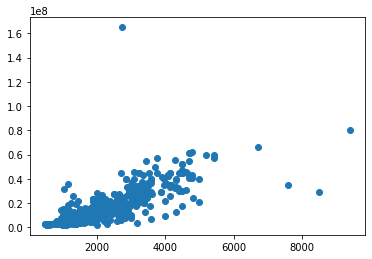

In [6]:
plt.scatter(data['Area'], data['Price'])

In [7]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.002936     | 144409623.356219   | 30889803.404714      | 4910791.547586                  | 4766050.410135                    |

In [8]:
simple_model.coefficients

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,-6267979.907234751,242941.83248782367
Area,None,9766.675109460191,134.2832229244693


In [9]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9766.675109460191
y-intercept: -6267979.907234751


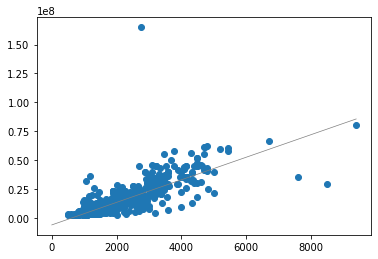

In [10]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [11]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 270

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.103940     | 140560487.985221   | 18968284.874518      | 4265044.186171                  | 3800770.085194                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [12]:
model.coefficients

name,index,value,stderr
(intercept),None,-3000347.8102523303,605956.868183006
Area,None,8954.760396216114,258.33567333254814
Location,Hitech City,4746031.282589323,789766.7684991818
Location,Manikonda,30669.19459349109,661170.639776188
Location,Alwal,-487724.87027076544,1253298.351110033
Location,Kukatpally,1734365.504097885,650495.0719047512
Location,Gachibowli,4612317.099027585,753750.8929489707
Location,Tellapur,-766497.8255326068,1063762.7326231874
Location,Kokapet,569010.9166089233,804317.6762626949
Location,Hyder Nagar,1713795.5178366934,2077956.0445792803


In [13]:
model.evaluate(data)

{'max_error': 140560487.98522052, 'rmse': 4243019.65083236}

In [14]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [15]:
model.predict(house)

dtype: float
Rows: 1
[2150914.706215744]

In [25]:
# rename columns to maintain a naming pattern(No. of Bedrooms)

data = data.rename({"No. of Bedrooms": "NofBedrooms"})

# Assignment 1 
Group:
* Mat Bosc
* Paola Katherine Pacheco
* Wai Ping Kwok
* Xueyao Wang

## Question 1 

### a) 2518 rows and 40 columns. 
We used the `data.show` function, similar to `info()` from Pandas.

In [16]:
data.show

<bound method SFrame.show of Columns:
	Price	int
	Area	int
	Location	str
	No. of Bedrooms	int
	Resale	int
	MaintenanceStaff	int
	Gymnasium	int
	SwimmingPool	int
	LandscapedGardens	int
	JoggingTrack	int
	RainWaterHarvesting	int
	IndoorGames	int
	ShoppingMall	int
	Intercom	int
	SportsFacility	int
	ATM	int
	ClubHouse	int
	School	int
	24X7Security	int
	PowerBackup	int
	CarParking	int
	StaffQuarter	int
	Cafeteria	int
	MultipurposeRoom	int
	Hospital	int
	WashingMachine	int
	Gasconnection	int
	AC	int
	Wifi	int
	Children'splayarea	int
	LiftAvailable	int
	BED	int
	VaastuCompliant	int
	Microwave	int
	GolfCourse	int
	TV	int
	DiningTable	int
	Sofa	int
	Wardrobe	int
	Refrigerator	int

Rows: 2518

Data:
+----------+------+-------------+-----------------+--------+------------------+
|  Price   | Area |   Location  | No. of Bedrooms | Resale | MaintenanceStaff |
+----------+------+-------------+-----------------+--------+------------------+
| 6968000  | 1340 |   Nizampet  |        2        |   0    | 

### b)
Potential Outliers:

* [16.5, 2750]
* [0.8, 9400]
* [0,66, 6718]
* [0,35, 7600]
* [0.29, 8500]


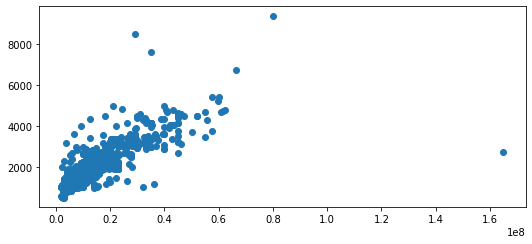

In [35]:
import matplotlib.pyplot as plt

plt.scatter(data['Price'], data['Area'])

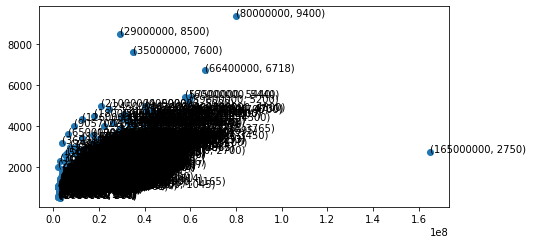

In [38]:
# find the coordinates

plt.scatter(data['Price'], data['Area'])


for xy in zip(data['Price'], data['Area']):
   plt.annotate(xy,xy=xy)

plt.show()

### c) 

### d) 

### e)

### f)